The first step should be importing the needed packages and defining the function f(x) and our initial parameters 

In [26]:
import numpy as np
import pandas as pd
from numpy import random
import numba
import scipy
import matplotlib

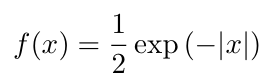 


In [27]:
def func(inp):
    return 0.5*np.exp(-np.abs(inp))

In [28]:
def metropolis_hasting(x_0, N=10000, s=1):
    x_values = [x_0]
    for i in range(1,N):
        xi_minus1 = x_values[-1]
        x_star = random.normal(scale=s, loc=xi_minus1)
        r = func(x_star)/func(xi_minus1)
        u = random.uniform(0,1)

        if np.log(u) < np.log(r):
            x_values.append(x_star)
        else:
            x_values.append(xi_minus1)
        
    return x_values            

         

In [29]:
x_values = metropolis_hasting(x_0=0,s=1)   
x_values[1:1000]

[0,
 0.3875664559534039,
 -0.42685314659181095,
 -0.509894241351516,
 -0.9103187053944721,
 -0.722206215228119,
 0.5332223965228167,
 0.5332223965228167,
 -0.9124350106835282,
 -0.7968290753559895,
 -2.0894816914743917,
 -2.0894816914743917,
 -1.7476718146931827,
 -1.7476718146931827,
 0.20171958497907982,
 0.9338157820997784,
 -0.4042225761222217,
 -0.4126988141486984,
 -0.34763922058818825,
 -0.976305446992529,
 0.24876268185747263,
 0.24876268185747263,
 0.24876268185747263,
 0.3236085884473482,
 -0.04079155232716869,
 -0.22902591040160822,
 0.2049055262240965,
 -0.3238483450250912,
 -0.32996432893263533,
 1.193008204271144,
 0.9211122919513028,
 0.30352081509052287,
 -0.19019687734495144,
 -0.19019687734495144,
 0.12340193527975513,
 0.12340193527975513,
 -0.6175690739371293,
 -0.6175690739371293,
 0.048313747709848975,
 0.048313747709848975,
 -0.36239143666437756,
 0.8848687282549025,
 0.9297649062770332,
 0.6972591750133924,
 0.6972591750133924,
 0.90956008858918,
 0.470968355601

<function matplotlib.pyplot.show(close=None, block=None)>

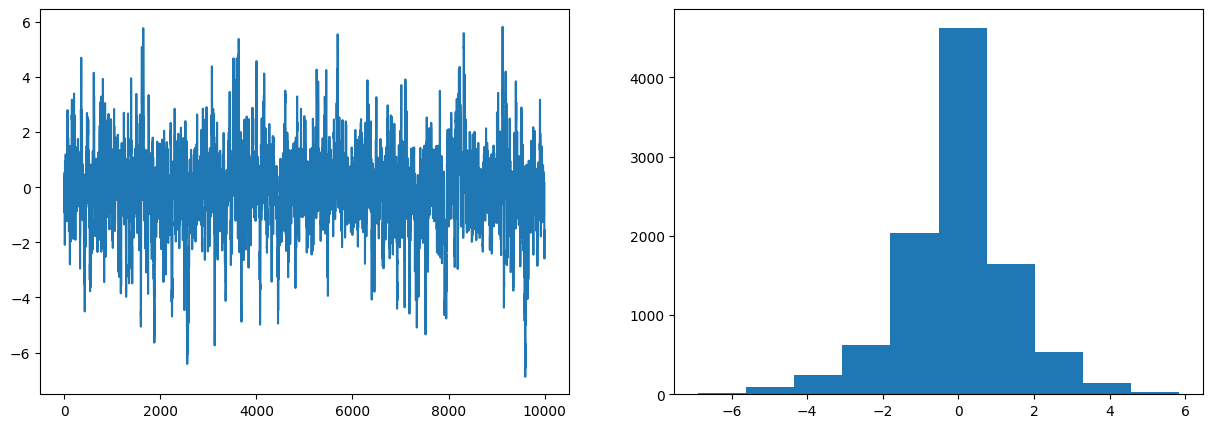

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values)

plt.subplot(1, 2, 2)
plt.hist(x_values)

plt.show

Now for the second part, we introduce chains.

In [31]:
def mean(N=10000):
    return 1/N*sum(x_values)

print("mean:", mean())

def variance(N= 10000):
    mu = mean()  
    squared_diff = [(x - mu) ** 2 for x in x_values]  # Squared differences
    return 1/N*sum(squared_diff)

print("Variance:", variance())

mean: -0.05694487800464018
Variance: 2.1401298257942014


In [32]:
def multi_metropolis_hasting(J, x_0=0, N=2000, s=0.001):
    multi = []
    for i in range(J):
        chain_result = metropolis_hasting(x_0 + i, N, s)
        multi.append(chain_result)
    return multi

chains = multi_metropolis_hasting(J=4)

for i in range(1,4):
    print(chains[i][1:10])


[1.0001316547535284, 1.0016928607693372, 1.0021212579194296, 1.001034159814261, 1.001855985005608, 1.0016977378590155, 1.001863541733018, 1.0018982785551807, 1.0026544950722733]
[2.0008553030913827, 2.0001116496882356, 1.9991861695810933, 2.000899012873209, 1.9996847038598453, 1.9997884062928666, 1.9995786907316637, 2.000646859573653, 2.0009672882246066]
[2.999899385401503, 3.000227240090219, 3.0012367577980097, 3.002107949351629, 3.0014766221294136, 3.001699599644623, 3.000921928546825, 3.0015997479278953, 3.0004362641348963]


In [33]:
def overall_mean(J,chains, N=2000, output=False):
    means = []
    for i in range(J):
        individual_mean = 1/N*sum(chains[i])
        means.append(individual_mean)
        if output == True:
            print(f"mean {i+1}: {individual_mean}")
    if output==True:
        print(f"total mean: {sum(means)/J}\n")

overall_mean(J=4, chains=chains, N=2000,output=True)


def between_variance(J, chains, N=2000,output=False):
    variances = []
    for i in range(J):
        chain_mean = 1 / N * sum(chains[i])  
        squared_diff = [(x - chain_mean) ** 2 for x in chains[i]]  
        chain_variance = sum(squared_diff) / N  
        variances.append(chain_variance)
        if output==True:
            print(f"Variance {i+1}: {chain_variance}")
    
    total_variance = sum(variances) / J
    if output == True:
        print(f"Overall variance: {total_variance}")
    return total_variance


between_variance(J=4, chains=chains, N=2000,output=True)
btw_var = between_variance(J=4, chains=chains, N=2000) 

def overall_variance(J, chains, N=2000):
    variances = []
    for i in range(J):
        varst = np.var(chains)
    return varst    

print(overall_variance(J=4, chains=chains, N=2000))

ovr_var = overall_variance(J=4, chains=chains, N=2000)


mean 1: 0.002752559140580128
mean 2: 1.0256227314679673
mean 3: 1.9822576613505805
mean 4: 3.020036866967747
total mean: 1.5076674547317188

Variance 1: 0.0001660208357729459
Variance 2: 0.00013225451539510149
Variance 3: 0.00017599456548926027
Variance 4: 0.0006042586482983347
Overall variance: 0.0002696321412389106
1.2526778975122883


In [34]:
R_hat = np.sqrt((ovr_var+btw_var)/ovr_var)

R_hat

np.float64(1.000107616504658)

In [35]:
s_values = np.linspace(0.001, 1, 1000)
R_hat_values = []

for s in s_values: 
    chains = multi_metropolis_hasting(J=4, s=s, N=2000, x_0=0)
    btw_var = between_variance(J=4, chains=chains, N=2000)
    ovr_var = overall_variance(J=4, chains=chains, N=2000)
    R_hat = np.sqrt((btw_var + ovr_var) / ovr_var)
    R_hat_values.append(R_hat)



In [36]:
trimmed_R_hat_values = R_hat_values.copy()
for i in range(len(trimmed_R_hat_values) - 1, -1, -1):  # Iterate in reverse
    if trimmed_R_hat_values[i] > 1.05:
        del trimmed_R_hat_values[i]


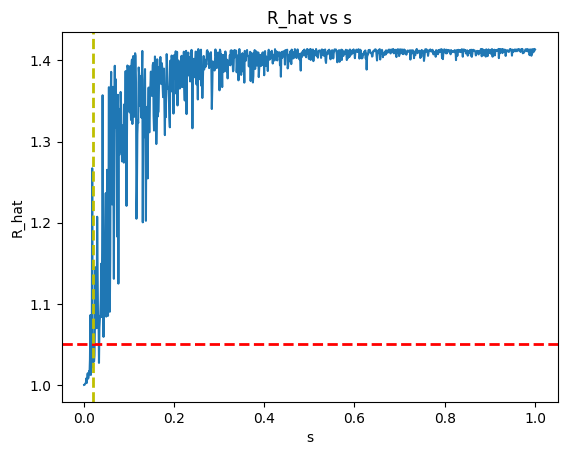

In [37]:
import matplotlib.pyplot as plt
plt.plot(s_values, R_hat_values)
plt.xlabel("s")
plt.ylabel("R_hat")
plt.title("R_hat vs s")
plt.axhline(y=1.05, color='r', linestyle='--', linewidth=2)
plt.axvline(x=len(trimmed_R_hat_values)/1000, color='y', linestyle = '--', linewidth=2)
plt.show()